In [49]:
import pandas as pd

# Dataset com características das casas de regioes da California
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [50]:
# Checando se a feature ocean_proximity é categórica
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [51]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [52]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


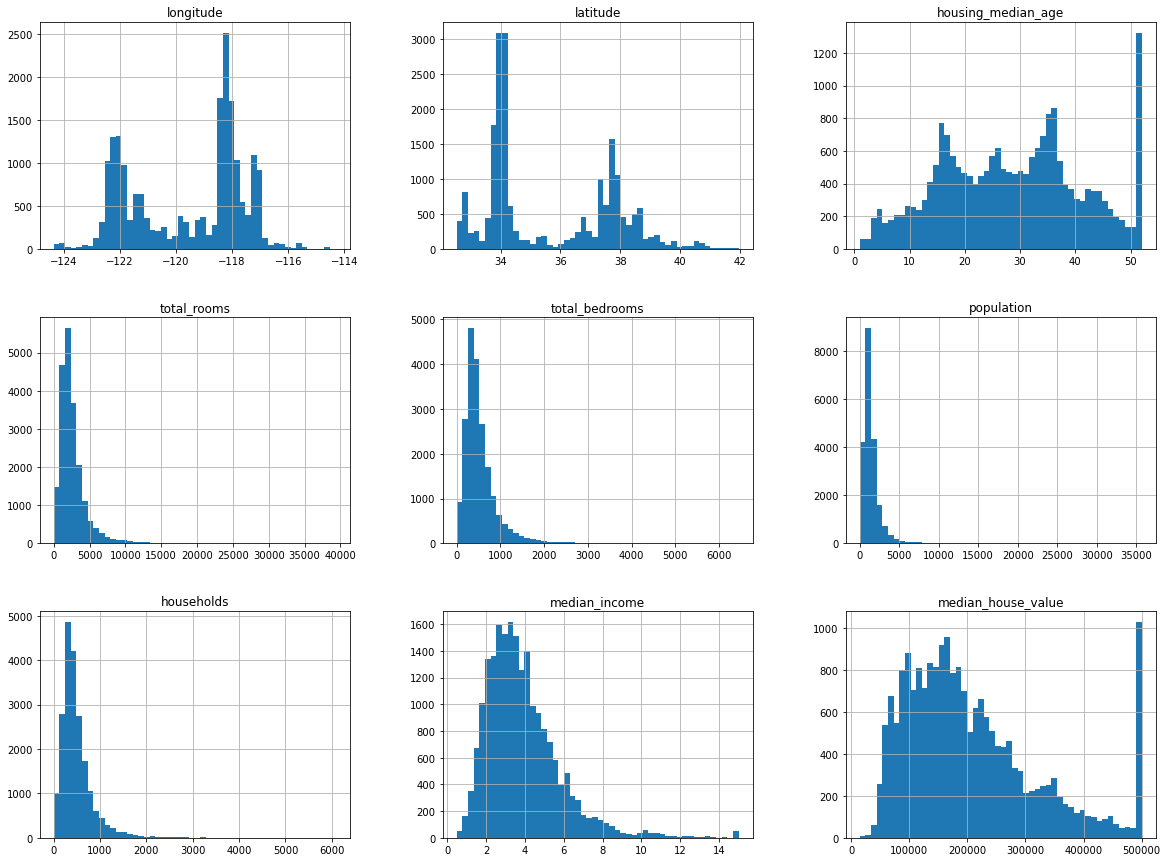

In [53]:
# Plotando histogrmas das features
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:>

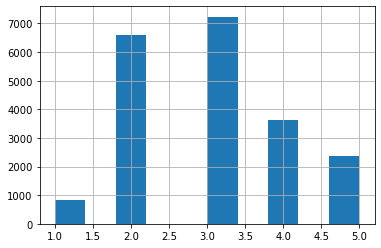

In [54]:
# dividindo o dataset em treino e teste de modo estratificado baseado na feature median_income (renda média)
# criando uma feature categórica para o atributo median_income
# não pode ter muitos estratos e eles devem ser grandes o bastante
# serão criadas 5 categorias, definidas no parametro bins
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3., 4.5, 6., float("inf")], labels=[1,2,3,4,5])
housing["income_cat"].hist()

In [55]:
# Dividindo em treino e teste
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=7)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# Veirificando se proporção dos dados é mantida no conjunto de teste
housing["income_cat"].value_counts() / len(housing)    

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [56]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [57]:
# Removendo a feature income_cat
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

strat_train_set.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 8088 to 2786
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16356 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

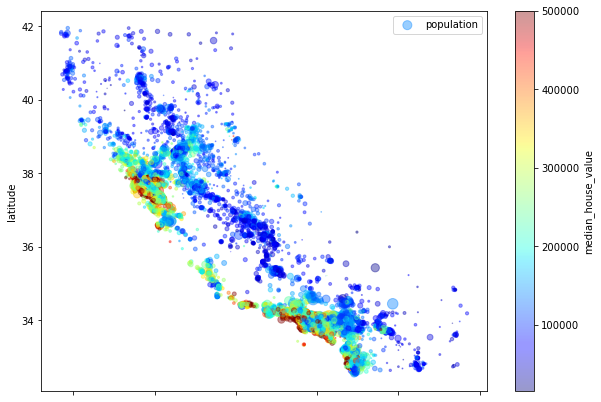

In [58]:
# Visualizando os dados
# Copiando o conjunto de treino
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
# As casas mais próximas ao mar são as mais caras

In [59]:
# Buscando correlações entre as features
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.686289
total_rooms           0.135723
housing_median_age    0.109030
households            0.066404
total_bedrooms        0.050819
population           -0.024405
longitude            -0.045513
latitude             -0.145896
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

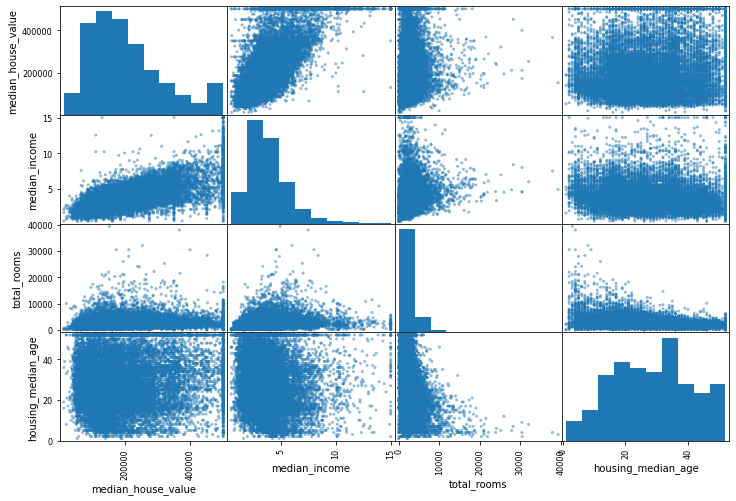

In [60]:
# Buscando correlações por graficos de dispersão
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

In [61]:
# Combinando features
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.686289
rooms_per_household         0.147401
total_rooms                 0.135723
housing_median_age          0.109030
households                  0.066404
total_bedrooms              0.050819
population_per_household   -0.021876
population                 -0.024405
longitude                  -0.045513
latitude                   -0.145896
bedrooms_per_room          -0.253819
Name: median_house_value, dtype: float64

In [62]:
# Copiando novamente o conjunto de treino e seperando a variável alvo
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [63]:
# Tratando dados ausentes
from sklearn.impute import SimpleImputer
# Usando a media para substituir os valores ausentes
imputer = SimpleImputer(strategy="median")
# Retirando as variaveis categoricas
housing_num = housing.drop("ocean_proximity", axis=1)
# Treinando o imputer
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [64]:
# Comparando os valores
# é importante fazer o imputer mesmo para features que nao tem valores ausentes no conjunto de treino/teste, pois pode acontecer que em dados novos possuam dados ausentes nessas features 
print(imputer.statistics_)
print(housing_num.median().values)

[-118.5       34.26      29.      2125.       435.      1166.5
  409.         3.53715]
[-118.5       34.26      29.      2125.       435.      1166.5
  409.         3.53715]


In [65]:
# Substituindo os valores ausentes com o imputer treinado
X = imputer.transform(housing_num)
# Adicionando as features numericas transformadas de volta ao conjunto de treino
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [66]:
# Tratando as features categoricas
housing_cat = housing["ocean_proximity"]
housing_cat.value_counts()

<1H OCEAN     7307
INLAND        5269
NEAR OCEAN    2114
NEAR BAY      1817
ISLAND           5
Name: ocean_proximity, dtype: int64

In [67]:
# Utilizando o OneHotEncoder para transformar as features categoricas em features numericas
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat.values.reshape(-1, 1))
housing_cat_1hot
# Ele retorna uma matriz esparsa, que consome muito menos memoria

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [68]:
# Para exibir as categorias
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [69]:
# Criando um transformador customizado para combinar features
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # Não precisa fazer nada
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr.transform(housing.values)

In [70]:
# Como os dados tem escalas muito diferentes, é necessário escalona-los para melhor performance do modelo
# Ao utilizar varias etapas de transformacao que devem seguir uma ordem especifica, é bom utilizar o pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler #Subtrai a media e divide pelo desvio padrao

# Criando o pipeline para features numericas
num_pipeline = Pipeline([
        # Pode ter qualquer nome para cada etapa
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

# Treinando o pipeline
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [71]:
# Criando o pipeline para features numericas e categoricas
from sklearn.compose import ColumnTransformer

# Por padrao, as colunas nao listadas sao dropadas
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

# Treina e transforma os dados
housing_prepared = full_pipeline.fit_transform(housing)    

In [72]:
# Treinando o modelo
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [73]:
# Testando o modelo em alguns dados do conjunto de treino
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [181658.43307811 212825.92433789 196623.32365586 138853.09341481
 386884.20734771]
Labels: [139300.0, 215800.0, 275000.0, 90400.0, 500001.0]


In [74]:
# Calculando o MSE em todo conjunto de treino
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print("Linear Regression RMSE: ", lin_rmse)

Linear Regression RMSE:  68026.71380807209


In [75]:
# Testando com arvore de decisao
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print("Decision Tree RMSE: ", tree_rmse)

Decision Tree RMSE:  0.0


In [76]:
# Usando validação cruzada
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [77]:
# Criando funcao para exibir os resultados
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

# Resultados da validação cruzada com arvore de decisao
display_scores(tree_rmse_scores)    

Scores: [67802.33425231 70748.85362857 73252.84428142 70097.66753511
 67092.65027145 67798.02840806 71637.48602705 72540.58820529
 71769.29742401 71933.18891355]
Mean: 70467.29389468301
Standard Deviation: 2076.110751517513


In [78]:
# Resultados da validação cruzada com regressao linear
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [67267.56193632 64968.16406754 67036.41034003 69640.03661198
 68184.74025112 66300.34825771 71644.15475242 71600.23228249
 68229.95760782 69046.63829672]
Mean: 68391.82444041315
Standard Deviation: 2052.4197771729


In [79]:
# Testando com o Random Forest
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [48578.82824493 47580.63419296 49268.83004859 51420.40062899
 50515.4963356  50120.97407822 53352.45577727 52238.89782441
 50816.57233897 50339.57207762]
Mean: 50423.26615475429
Standard Deviation: 1610.830814198876


In [80]:
# Salvando o modelo
import joblib

joblib.dump(forest_reg, "housing_model.pkl")
# Para carregar o modelo
# my_model = joblib.load("housing_model.pkl")

['housing_model.pkl']

In [81]:
# Otimizando o modelo
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, # Testa os valores de n_estimators e max_features com bootstrap=True
        {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}, # Testa os valores de n_estimators e max_features com bootstrap=False
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [82]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [83]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63421.70353774822 {'max_features': 2, 'n_estimators': 3}
55151.22960353942 {'max_features': 2, 'n_estimators': 10}
53200.83837551274 {'max_features': 2, 'n_estimators': 30}
60030.172104214376 {'max_features': 4, 'n_estimators': 3}
53329.89749154849 {'max_features': 4, 'n_estimators': 10}
50463.34602742238 {'max_features': 4, 'n_estimators': 30}
59174.184641424356 {'max_features': 6, 'n_estimators': 3}
52120.69444205717 {'max_features': 6, 'n_estimators': 10}
50212.320444694655 {'max_features': 6, 'n_estimators': 30}
59336.84449176673 {'max_features': 8, 'n_estimators': 3}
52281.57644474315 {'max_features': 8, 'n_estimators': 10}
50526.6577918533 {'max_features': 8, 'n_estimators': 30}
62331.47702927221 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53900.54541641326 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59753.28375424423 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52714.48600562955 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [84]:
# Também é possível verificar a importancia de cada feature

feature_importances = grid_search.best_estimator_.feature_importances_
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3003899935894438, 'median_income'),
 (0.1589981220090688, 'INLAND'),
 (0.1083553624918701, 'pop_per_hhold'),
 (0.10543119324386052, 'bedrooms_per_room'),
 (0.07600038817628794, 'longitude'),
 (0.07038500500550164, 'latitude'),
 (0.05398465569050178, 'rooms_per_hhold'),
 (0.04218247245417864, 'housing_median_age'),
 (0.018041810849845283, 'total_rooms'),
 (0.017731015590398826, 'population'),
 (0.01645247657518746, 'total_bedrooms'),
 (0.01614049326211699, 'households'),
 (0.007448156766026748, '<1H OCEAN'),
 (0.005802857106586384, 'NEAR OCEAN'),
 (0.0025403566560725046, 'NEAR BAY'),
 (0.00011564053305252913, 'ISLAND')]

In [85]:
# Finalmente, podemos testar o modelo com dados de teste
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# Usar o metodo transform e nao o fit_transform
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("Final RMSE: ", final_rmse)

Final RMSE:  47983.01474573255


In [86]:
# Calculando o intervalo de confiança
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([45844.08755617, 50030.58109118])

### Não cair na tentação de ajustar os hiperparâmetros para melhorar o resultado no conjunto de teste -> data leakage

In [87]:
# Ex 1 - Testando com o SVM
from sklearn.svm import SVR

param_grid = [
        {'kernel': ['linear'], 'C': [0.5, 1.0, 1.5, 2.0]},
        {'kernel': ['rbf'], 'C': [0.5, 1.0, 1.5, 2.0], 'gamma': [0.5, 1.0, 1.5, 2.0]}
]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, n_jobs=-1)
grid_search.fit(housing_prepared, housing_labels)
print(grid_search.best_params_)
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
print(rmse)

{'C': 2.0, 'kernel': 'linear'}
106797.56270852144


In [88]:
# Ex 2 - Usando RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat

param_rand = [
        {'kernel': ['linear', 'rbf'], 'C': sp_randFloat(10.0, 100000.0), 'gamma': sp_randFloat(0.0, 10.0)}
]

svm_reg = SVR()
rand_search = RandomizedSearchCV(svm_reg, param_rand, cv=5, scoring='neg_mean_squared_error', return_train_score=True, n_iter=50, n_jobs=-1, verbose=2, random_state=7)
rand_search.fit(housing_prepared, housing_labels)
print(rand_search.best_params_)
negative_mse = rand_search.best_score_
rmse = np.sqrt(-negative_mse)
print(rmse)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'C': 46323.62180381473, 'gamma': 0.5549950311272267, 'kernel': 'rbf'}
57831.34863259512


In [89]:
# Ex 3 - Pipeline para selecionar melhores features

from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [90]:
k = 5
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices
np.array(attributes)[top_k_feature_indices]
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.3003899935894438, 'median_income'),
 (0.1589981220090688, 'INLAND'),
 (0.1083553624918701, 'pop_per_hhold'),
 (0.10543119324386052, 'bedrooms_per_room'),
 (0.07600038817628794, 'longitude')]

In [91]:
# Adicionando ao pipeline
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [92]:
# Testando com 3 instancias
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)
housing_prepared_top_k_features[0:3]

array([[ 0.68138959, -0.53913578,  0.0673276 ,  0.26382394,  0.        ],
       [ 1.15127891,  0.06038773,  0.03982342, -0.59868773,  0.        ],
       [-1.25315474, -0.76245671, -0.10811988,  1.54678164,  0.        ]])

In [93]:
housing_prepared[0:3, top_k_feature_indices]

array([[ 0.68138959, -0.53913578,  0.0673276 ,  0.26382394,  0.        ],
       [ 1.15127891,  0.06038773,  0.03982342, -0.59868773,  0.        ],
       [-1.25315474, -0.76245671, -0.10811988,  1.54678164,  0.        ]])

In [94]:
# Ex 4 - Pipeline com a prepracação dos dados e a predição

prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rand_search.best_params_))
])

prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                    

In [95]:
# Testando
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [159047.18673691 162825.50328516 213975.83538094 141215.72640018]
Labels:		 [139300.0, 215800.0, 275000.0, 90400.0]


In [96]:
# Ex 5 - Explorar automaticamente opcoes de preparacao dos dados com o grid search
param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
grid_search_prep.fit(housing, housing_labels)
print(grid_search_prep.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'feature_selection__k': 10, 'preparation__num__imputer__strategy': 'mean'}
